# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.261775e+01     1.433666e+01
 * time: 0.0028722286224365234
     1     6.074230e+01     1.173907e+01
 * time: 0.007768154144287109
     2     5.328877e+01     1.476887e+01
 * time: 0.018561124801635742
     3     4.038619e+01     1.047932e+01
 * time: 0.03221702575683594
     4     3.244512e+01     8.671143e+00
 * time: 0.04487419128417969
     5     1.291354e+01     2.829746e+00
 * time: 0.1081080436706543
     6     1.027247e+01     3.314735e+00
 * time: 0.11794614791870117
     7     8.341115e+00     2.213835e+00
 * time: 0.12818121910095215
     8     7.285599e+00     4.546125e+00
 * time: 0.13610410690307617
     9     6.601193e+00     2.323445e+00
 * time: 0.14629912376403809
    10     6.210136e+00     2.456529e+00
 * time: 0.15503311157226562
    11     5.933766e+00     2.197398e+00
 * time: 0.1628561019897461
    12     5.769756e+00     1.494255e+00
 * time: 0.17043709754943848
    13     5.647714e+00     1.509074e+00
 * tim

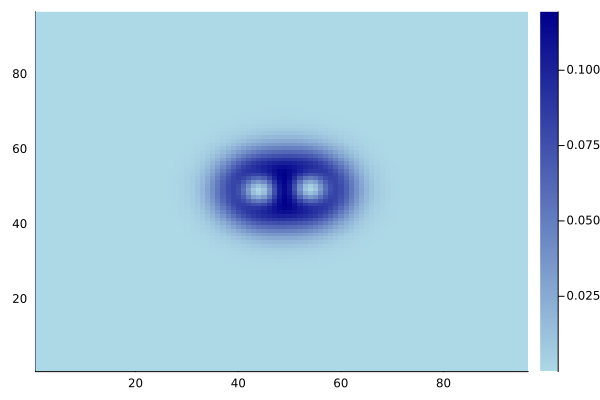

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)